<a href="https://colab.research.google.com/github/ggwnsghgg/FastCampus/blob/main/movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
    
import os
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Google colab: 데이터 경로 설정
path = '/content/drive/MyDrive/data/movielens/'
os.listdir(path)

['ratings.csv', 'tags.csv', 'movies.csv', 'links.csv', 'README.txt']

In [10]:

ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [11]:

print(ratings_df.shape)
print(ratings_df.head())

(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [12]:
print(tags_df.shape)
print(tags_df.head())

(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


In [13]:
print(movies_df.shape)
print(movies_df.head())

(9742, 2)
                                      title                                       genres
movieId                                                                                 
1                          Toy Story (1995)  Adventure|Animation|Children|Comedy|Fantasy
2                            Jumanji (1995)                   Adventure|Children|Fantasy
3                   Grumpier Old Men (1995)                               Comedy|Romance
4                  Waiting to Exhale (1995)                         Comedy|Drama|Romance
5        Father of the Bride Part II (1995)                                       Comedy


In [19]:
n_unique_users = len(ratings_df['userId'].unique())
print(n_unique_users)

610


In [20]:
n_unique_movies = len(ratings_df['movieId'].unique())
print(n_unique_movies)

9724


In [21]:
print('평점의 평균: ', ratings_df['rating'].mean())
print('평점의 표준편차: ', ratings_df['rating'].std())

평점의 평균:  3.501556983616962
평점의 표준편차:  1.0425292390605359


In [22]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [23]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [24]:
# nan 값이 있는지 확인한다
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0366480790>,
      dtype=object)

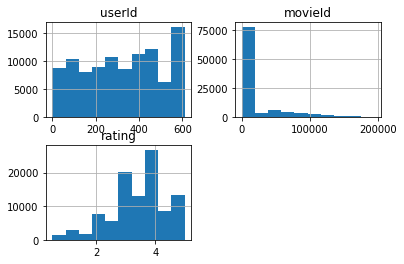

In [25]:
ratings_df[['userId','movieId','rating']].hist()

In [26]:
ratings_df.groupby(['userId']).mean()

,movieId,rating,timestamp
userId,,,
1,1854.603448,4.366379,9.649856e+08
2,70350.275862,3.948276,1.445715e+09
3,7058.384615,2.435897,1.306464e+09
4,1982.129630,3.555556,9.658643e+08
5,343.840909,3.636364,8.474351e+08
...,...,...,...
606,9692.197309,3.657399,1.179512e+09
607,1860.636364,3.786096,9.647841e+08
608,4502.605295,3.134176,1.122668e+09


In [27]:

userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index()
userid_rating_df.head(10)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26
3,1,4.0,76
4,1,5.0,124
5,2,2.0,1
6,2,2.5,1
7,2,3.0,4
8,2,3.5,4
9,2,4.0,9


In [28]:
user_info = ratings_df.groupby('userId')['movieId'].count()

In [29]:
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

In [30]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


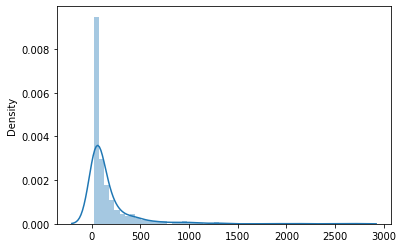

In [31]:

# user가 몇개의 영화에 대해서 rating을 했는지를 볼 수 있는 분포(그래프)
sns.distplot(user_info.values)

## user가 평균적으로 준 평점과 평점을 준 영화의 수

In [32]:

stats_df = pd.DataFrame({
    'movie_count': ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg': ratings_df.groupby('userId')['rating'].mean(), 
'rating_std': ratings_df.groupby('userId')['rating'].std()})

print(stats_df.shape)
print(stats_df.head())

(610, 3)
        movie_count  rating_avg  rating_std
userId                                     
1               232    4.366379    0.800048
2                29    3.948276    0.805615
3                39    2.435897    2.090642
4               216    3.555556    1.314204
5                44    3.636364    0.990441



## rating이 많은 영화(다시 말해, 사람들이 관심 많은 영화)
- 많이 본 영화일수록 평점이 좋다?

In [33]:
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std()
})
movieid_user_df = movieid_user_df.reset_index()
print(movieid_user_df.shape)
print(movieid_user_df.head(10))

SyntaxError: ignored